In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
import sklearn.metrics as metrics

# from random import gauss
# from mpl_toolkits.mplot3d import Axes3D

from statsmodels.formula.api import ols
import statsmodels.api as sm

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Shows *all* columns in dataframe, i.e. does not truncate horizontally
pd.set_option('display.max_columns', None)

# Converts from scientific notation to standard form (applied to every df in
# this notebook) and rounds to two decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df = pd.read_csv('../data/kc_house_data.csv')

# Listing out column names
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
# Converting column `date` to datetime64[ns] from type string/object
df['date'] = df['date'].astype('datetime64[ns]')

In [5]:
df_copy = df.copy()

In [6]:
df_copy['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [7]:
df_copy = df_copy.sort_values(by=['id', 'date'])
df_copy = df_copy.drop_duplicates(subset=['id'], keep='last')

In [8]:
#looking at correlations
#fig, ax = plt.subplots(figsize=(15,15))
#heat = sns.heatmap(df_copy.corr(), annot = True)

In [9]:
df_copy.groupby('view').mean()

df_copy.sort_values('price', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,2014-10-13,7700000.00,6,8.00,12050,27600,2.50,NO,GOOD,Good,13 Mansion,8570,3480.0,1910,1987.00,98102,47.63,-122.32,3940,8800
3910,9808700762,2014-06-11,7060000.00,5,4.50,10040,37325,2.00,YES,AVERAGE,Average,11 Excellent,7680,2360.0,1940,2001.00,98004,47.65,-122.21,3930,25449
9245,9208900037,2014-09-19,6890000.00,6,7.75,9890,31374,2.00,NO,EXCELLENT,Average,13 Mansion,8860,1030.0,2001,0.00,98039,47.63,-122.24,4540,42730
4407,2470100110,2014-08-04,5570000.00,5,5.75,9200,35069,2.00,NO,NONE,Average,13 Mansion,6200,3000.0,2001,nan,98039,47.63,-122.23,3560,24345
1446,8907500070,2015-04-13,5350000.00,5,5.00,8000,23985,2.00,NO,EXCELLENT,Average,12 Luxury,6720,1280.0,2009,0.00,98004,47.62,-122.22,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18453,7999600180,2014-05-29,83000.00,2,1.00,900,8580,1.00,NO,NONE,Average,5 Fair,900,0.0,1918,0.00,98168,47.47,-122.27,2060,6533
2139,1623049041,2014-05-08,82500.00,2,1.00,520,22334,1.00,NO,NONE,Fair,5 Fair,520,0.0,1951,0.00,98168,47.48,-122.30,1572,10570
16184,3028200080,2015-03-24,81000.00,2,1.00,730,9975,1.00,NaN,NONE,Poor,5 Fair,730,0.0,1943,0.00,98168,47.48,-122.31,860,9000
465,8658300340,2014-05-23,80000.00,1,0.75,430,5050,1.00,NaN,NONE,Fair,4 Low,430,0.0,1912,0.00,98014,47.65,-121.91,1200,7500


In [10]:
# Dropping irrelevant columns
df_copy.drop(columns = ['id', 'floors', 'waterfront', 'date',
                        'lat', 'long', 'condition', 'yr_renovated',
                         'sqft_lot15','sqft_above', 'sqft_living15',
                         'sqft_basement'],
                        inplace=True)

In [11]:
df_copy.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade,yr_built,zipcode
2495,300000.00,6,3.00,2400,9373,NONE,7 Average,1991,98002
6729,647500.00,4,1.75,2060,26036,NONE,8 Good,1947,98166
8404,400000.00,3,1.00,1460,43000,NONE,7 Average,1952,98166
8800,235000.00,3,1.00,1430,7599,NONE,6 Low Average,1930,98168
3553,402500.00,4,2.00,1650,3504,NONE,7 Average,1951,98144


In [12]:
# Establishing target and predictor variables
df_copy = df_copy[df_copy['grade'] != '3 Poor']
X = df_copy.drop(columns = 'price')
y = df_copy.price

In [13]:
# Creating variables for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
train_df = pd.concat([X_train, y_train], axis=1)

test_df = pd.concat([X_test, y_test], axis=1)

In [15]:
summary_of_view = df_copy.groupby('view').agg(['mean', 'std'])

summary_of_view

price           bedrooms      bathrooms      sqft_living  \
                mean       std     mean  std      mean  std        mean   
view                                                                      
AVERAGE    791956.68 510351.93     3.57 0.98      2.43 0.87     2651.20   
EXCELLENT 1454416.19 934214.96     3.63 1.10      2.78 1.07     3337.17   
FAIR       814386.56 513226.70     3.53 0.98      2.35 0.84     2573.51   
GOOD       972849.27 615076.79     3.67 0.93      2.67 0.89     3012.47   
NONE       498348.59 287343.67     3.35 0.92      2.07 0.74     2001.25   

                  sqft_lot           yr_built        zipcode        
              std     mean       std     mean   std     mean   std  
view                                                                
AVERAGE   1133.59 22331.72  60261.29  1964.82 29.70 98090.98 59.82  
EXCELLENT 1544.93 21762.46  35989.90  1965.77 27.23 98096.41 61.65  
FAIR      1042.89 12342.66  17078.17  1962.90 26.36 98096.60 61.08  
GOOD      1204.88 35010.67 109236.86  1967.34 30.00 98092.44 62.24  
NONE       837.14 14178.52  37110.06  1971.74 29.37 98076.21 52.33

In [16]:
# Figure out how to do this in a loop/function?
df_average = train_df[train_df['view'] == 'AVERAGE']
df_excellent = train_df[train_df['view'] == 'EXCELLENT']
df_fair = train_df[train_df['view'] == 'FAIR']
df_good = train_df[train_df['view'] == 'GOOD']
df_none = train_df[train_df['view'] == 'NONE']

In [17]:
train_df['view'].value_counts()

NONE         12913
AVERAGE        637
GOOD           336
FAIR           230
EXCELLENT      192
Name: view, dtype: int64

In [18]:
fvalue, pvalue = stats.f_oneway(df_average['price'], df_excellent['price'], df_fair['price'],
                                df_good['price'] , df_none['price'])

In [19]:
train_df.grade.value_counts()

7 Average        5975
8 Good           4030
9 Better         1744
6 Low Average    1349
10 Very Good      754
11 Excellent      261
5 Fair            147
12 Luxury          64
4 Low              19
13 Mansion          7
Name: grade, dtype: int64

In [20]:
# Dropping poor row, since there is only one
df3 = train_df.copy()

In [21]:
df3.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade,yr_built,zipcode,price
14622,4,2.50,1750,8476,NONE,7 Average,1983,98058,335000.00
1744,4,2.50,2660,5608,NONE,9 Better,2003,98029,729000.00
2729,3,1.00,1740,5247,NONE,7 Average,1947,98168,283000.00
13117,4,2.50,2700,5100,NONE,8 Good,1968,98136,550000.00
18281,3,1.75,1380,8182,NONE,7 Average,1942,98133,425000.00


In [22]:
df3.grade = [x.replace(" ", "_").strip() for x in df3.grade]

In [23]:
df3['grade'].value_counts()

7_Average        5975
8_Good           4030
9_Better         1744
6_Low_Average    1349
10_Very_Good      754
11_Excellent      261
5_Fair            147
12_Luxury          64
4_Low              19
13_Mansion          7
Name: grade, dtype: int64

In [24]:
# Might need a for loop or a function here
df_10 = train_df[train_df['grade'] == '10 Very Good']
df_11 = train_df[train_df['grade'] == '11 Excellent']
df_12 = train_df[train_df['grade'] == '12 Luxury']
df_4 = train_df[train_df['grade'] == '4 Low']
df_5 = train_df[train_df['grade'] == '5 Fair']
df_6 = train_df[train_df['grade'] == '6 Low Average']
df_7 = train_df[train_df['grade'] == '7 Average']
df_8 = train_df[train_df['grade'] == '8 Good']
df_9 = train_df[train_df['grade'] == '9 Better']

In [25]:
# Finding f-statistic and p-value using ANOVA testing

f_value_grade, p_value_grade = stats.f_oneway(df_10['price'], df_11['price'], df_12['price'],
                                              df_4['price'], df_5['price'], df_6['price'],
                                              df_7['price'], df_8['price'], df_9['price'])
p_value_grade

0.0

In [26]:
# Ad-hoc test to determine differeces in price vs. grade

df_grade = train_df[['grade', 'price']]

print(pairwise_tukeyhsd(df_grade['price'], df_grade['grade']))

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
    group1        group2       meandiff   p-adj      lower         upper     reject
-----------------------------------------------------------------------------------
 10 Very Good  11 Excellent   381056.6583  0.001   322630.8353   439482.4812   True
 10 Very Good     12 Luxury  1074763.4844  0.001   968843.2982  1180683.6706   True
 10 Very Good    13 Mansion  2930578.2166  0.001  2621665.7899  3239490.6432   True
 10 Very Good         4 Low  -879246.2195  0.001 -1068221.5081   -690270.931   True
 10 Very Good        5 Fair   -826698.729  0.001  -900047.9995  -753349.4585   True
 10 Very Good 6 Low Average  -769929.2032  0.001   -806921.026  -732937.3804   True
 10 Very Good     7 Average  -672494.5974  0.001  -703935.7443  -641053.4505   True
 10 Very Good        8 Good  -533427.0034  0.001  -565707.1228  -501146.8839   True
 10 Very Good      9 Better  -300298.5162  0.001  -335756.5824  -264840.4499

In [27]:
#making the categorical variable
cate_column = df3[['grade', 'view', 'zipcode']]

cate_column

,grade,view,zipcode
14622,7_Average,NONE,98058
1744,9_Better,NONE,98029
2729,7_Average,NONE,98168
13117,8_Good,NONE,98136
18281,7_Average,NONE,98133
...,...,...,...
13105,7_Average,NONE,98178
17476,7_Average,NONE,98166
9990,7_Average,NONE,98034
338,7_Average,NONE,98133


In [28]:
df3.view.value_counts()

NONE         12913
AVERAGE        637
GOOD           336
FAIR           230
EXCELLENT      192
Name: view, dtype: int64

In [29]:
df_copy.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'view',
       'grade', 'yr_built', 'zipcode'],
      dtype='object')

In [30]:
len(df_copy.zipcode.unique())

70

In [31]:
#ohe = OneHotEncoder(drop = 'if_binary')

#column_name = ['grade', 'view', 'zipcode']
#features = cate_column.copy()

#features2 = features[column_name]

#cate_ohe = ohe.fit_transform(features2)

#cate_ohe

In [32]:
#name = ohe.get_feature_names_out()

In [33]:
#df3.grade.value_counts()

In [34]:
#cate_parsed = pd.DataFrame(cate_ohe.todense(), columns = name, index = features.index)
#cate_parsed

In [35]:
#cate_parsed.drop(columns = ['view_FAIR', 'grade_4_Low'], inplace = True)

Dropping the view_Fair because it's not different in term of mean price compared to average, dropping low in grade because it's not significant to some other grades but significant to others.

In [36]:
# Creating dataframe with only numerical columns
#numbers = train_df.select_dtypes(np.number)

In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14350 entries, 14622 to 9180
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     14350 non-null  int64  
 1   bathrooms    14350 non-null  float64
 2   sqft_living  14350 non-null  int64  
 3   sqft_lot     14350 non-null  int64  
 4   view         14308 non-null  object 
 5   grade        14350 non-null  object 
 6   yr_built     14350 non-null  int64  
 7   zipcode      14350 non-null  int64  
 8   price        14350 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 1.1+ MB


In [38]:
#df3.zipcode = df3.zipcode.astype(str)

In [39]:
len(df3.zipcode.unique())

70

In [40]:
cat_cols = [c for c in df3.columns if df3[c].dtype == 'O']

encoder = OneHotEncoder(drop='if_binary')
from sklearn.compose import ColumnTransformer

# Create an columntransformer object.
# This will help us to merge transformed columns
# with the rest of the dataset.

ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                       remainder='passthrough')
ct.fit(df3)
X_train_enc = ct.transform(df3)
X_train_enc

array([[     0.,      0.,      0., ...,   1983.,  98058., 335000.],
       [     0.,      0.,      0., ...,   2003.,  98029., 729000.],
       [     0.,      0.,      0., ...,   1947.,  98168., 283000.],
       ...,
       [     0.,      0.,      0., ...,   1960.,  98034., 620000.],
       [     0.,      0.,      0., ...,   1954.,  98133., 265000.],
       [     0.,      0.,      0., ...,   1942.,  98056., 139000.]])

In [41]:
X_train_enc= pd.DataFrame(X_train_enc, columns= ct.get_feature_names())

C:\Users\xiaoh\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [42]:
#Rework to include only the train_df
#ss = StandardScaler()

#columns_name1 = ['price', 'sqft_living']
#numbers_scaling = numbers.copy()

#features= numbers_scaling[columns_name1]

#scale1 = ss.fit(features)
#scale2 = scale1.transform(features)
#numbers_scaling[columns_name1] = scale2

#numbers_scaling

In [43]:
# Instantiate our scaler

scaler = StandardScaler()

# Fit our scaler 

scaler.fit(X_train_enc)

# Transform training data

X_train_scaled = scaler.transform(X_train_enc)
X_train_scaled

array([[-0.21552789, -0.11645273, -0.12762818, ...,  0.4036936 ,
        -0.3746041 , -0.56265404],
       [-0.21552789, -0.11645273, -0.12762818, ...,  1.08548407,
        -0.91880207,  0.51143509],
       [-0.21552789, -0.11645273, -0.12762818, ..., -0.82352925,
         1.68959511, -0.70441199],
       ...,
       [-0.21552789, -0.11645273, -0.12762818, ..., -0.38036544,
        -0.82497483,  0.21428861],
       [-0.21552789, -0.11645273, -0.12762818, ..., -0.58490258,
         1.03280445, -0.75348205],
       [-0.21552789, -0.11645273, -0.12762818, ..., -0.99397686,
        -0.41213499, -1.09697249]])

In [44]:
y_train.shape

(14350,)

In [45]:
scaled_p_df = pd.DataFrame(X_train_scaled, columns= ct.get_feature_names_out(), index = y_train.index)

In [46]:
scaled_p_df.head()

,ohe__view_AVERAGE,ohe__view_EXCELLENT,ohe__view_FAIR,ohe__view_GOOD,ohe__view_NONE,ohe__view_nan,ohe__grade_10_Very_Good,ohe__grade_11_Excellent,ohe__grade_12_Luxury,ohe__grade_13_Mansion,ohe__grade_4_Low,ohe__grade_5_Fair,ohe__grade_6_Low_Average,ohe__grade_7_Average,ohe__grade_8_Good,ohe__grade_9_Better,remainder__bedrooms,remainder__bathrooms,remainder__sqft_living,remainder__sqft_lot,remainder__yr_built,remainder__zipcode,remainder__price
14622,-0.22,-0.12,-0.13,-0.15,0.33,-0.05,-0.24,-0.14,-0.07,-0.02,-0.04,-0.10,-0.32,1.18,-0.62,-0.37,0.66,0.49,-0.36,-0.17,0.40,-0.37,-0.56
1744,-0.22,-0.12,-0.13,-0.15,0.33,-0.05,-0.24,-0.14,-0.07,-0.02,-0.04,-0.10,-0.32,-0.84,-0.62,2.69,0.66,0.49,0.63,-0.24,1.09,-0.92,0.51
2729,-0.22,-0.12,-0.13,-0.15,0.33,-0.05,-0.24,-0.14,-0.07,-0.02,-0.04,-0.10,-0.32,1.18,-0.62,-0.37,-0.40,-1.46,-0.37,-0.25,-0.82,1.69,-0.70
13117,-0.22,-0.12,-0.13,-0.15,0.33,-0.05,-0.24,-0.14,-0.07,-0.02,-0.04,-0.10,-0.32,-0.84,1.60,-0.37,0.66,0.49,0.68,-0.25,-0.11,1.09,0.02
18281,-0.22,-0.12,-0.13,-0.15,0.33,-0.05,-0.24,-0.14,-0.07,-0.02,-0.04,-0.10,-0.32,1.18,-0.62,-0.37,-0.40,-0.48,-0.77,-0.17,-0.99,1.03,-0.32


In [47]:
scaled_p_df.columns = [x.replace("ohe__", "").replace('remainder__','').strip() for x in scaled_p_df.columns]

In [48]:
scaled_p_df.head()

,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,view_nan,grade_10_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,zipcode,price
14622,-0.22,-0.12,-0.13,-0.15,0.33,-0.05,-0.24,-0.14,-0.07,-0.02,-0.04,-0.10,-0.32,1.18,-0.62,-0.37,0.66,0.49,-0.36,-0.17,0.40,-0.37,-0.56
1744,-0.22,-0.12,-0.13,-0.15,0.33,-0.05,-0.24,-0.14,-0.07,-0.02,-0.04,-0.10,-0.32,-0.84,-0.62,2.69,0.66,0.49,0.63,-0.24,1.09,-0.92,0.51
2729,-0.22,-0.12,-0.13,-0.15,0.33,-0.05,-0.24,-0.14,-0.07,-0.02,-0.04,-0.10,-0.32,1.18,-0.62,-0.37,-0.40,-1.46,-0.37,-0.25,-0.82,1.69,-0.70
13117,-0.22,-0.12,-0.13,-0.15,0.33,-0.05,-0.24,-0.14,-0.07,-0.02,-0.04,-0.10,-0.32,-0.84,1.60,-0.37,0.66,0.49,0.68,-0.25,-0.11,1.09,0.02
18281,-0.22,-0.12,-0.13,-0.15,0.33,-0.05,-0.24,-0.14,-0.07,-0.02,-0.04,-0.10,-0.32,1.18,-0.62,-0.37,-0.40,-0.48,-0.77,-0.17,-0.99,1.03,-0.32


In [49]:
scaled_p_df.drop(columns = ['view_FAIR', 'grade_4_Low'], inplace = True)

In [50]:
#cate_parsed.info()

In [51]:
#cate_parsed.head()

In [52]:
#combinig scale and ohe
#scaled_and_parse_df = pd.concat([numbers_scaling, cate_parsed], axis = 1)

In [53]:
#scaled_and_parse_df.columns = [x.replace(" ", "_").strip() for x in scaled_and_parse_df.columns]

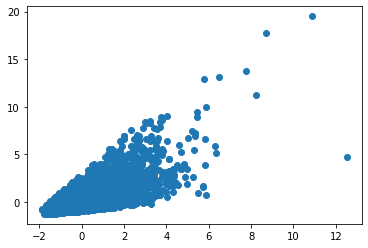

In [54]:
fig, ax = plt.subplots()

x = scaled_p_df['sqft_living']
y = scaled_p_df['price']


ax.scatter(x, y);

In [55]:
np.corrcoef(df['sqft_living'],df['price'])

array([[1.       , 0.7019173],
       [0.7019173, 1.       ]])

In [56]:
# Baseline model
# Import necessary package
from sklearn.dummy import DummyRegressor

# Instantiate
dummy_lr = DummyRegressor()

# Create variables
X = scaled_p_df['sqft_living']
y = scaled_p_df['price']

# Fit
dummy_lr.fit(X,y)

# Score
dummy_lr.score(X,y)

0.0

In [57]:
#Define X and y variable using scaled & parse dataframe

X_s_p = scaled_p_df[['sqft_living']]
y_s_p = scaled_p_df[['price']]

In [58]:
sk_lr = LinearRegression()
sk_lr.fit(X_s_p, y_s_p)
preds = sk_lr.predict(y_s_p)

preds

C:\Users\xiaoh\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- price
Feature names seen at fit time, yet now missing:
- sqft_living

  warnings.warn(message, FutureWarning)


array([[-0.39294888],
       [ 0.35717836],
       [-0.49195044],
       ...,
       [ 0.14965585],
       [-0.52622021],
       [-0.76610862]])

In [59]:
X = scaled_p_df['sqft_living']
y = scaled_p_df[['price']]

In [60]:
X = scaled_p_df['sqft_living']
y = scaled_p_df[['price']]


In [61]:
X = scaled_p_df['sqft_living']
y = scaled_p_df[['price']]
resids = y - preds
resids

,price
14622,-0.17
1744,0.15
2729,-0.21
13117,0.01
18281,-0.10
...,...
13105,-0.20
17476,-0.22
9990,0.06
338,-0.23


In [62]:
#Create out bins

bins = int( len(X)**.5)
bins

119

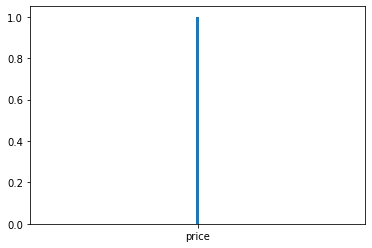

In [63]:
# Histogram of residuals

plt.hist(resids, bins=bins);

In [64]:
print(resids.max())
resids.min()

price   5.89
dtype: float64


price   -0.38
dtype: float64

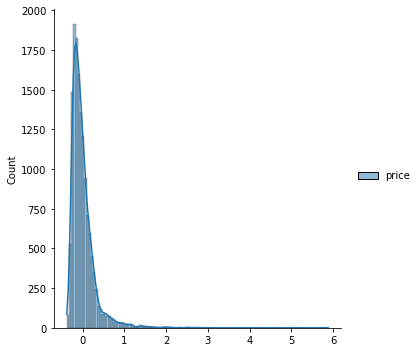

In [65]:
sns.displot(resids, bins=bins, kde=True)

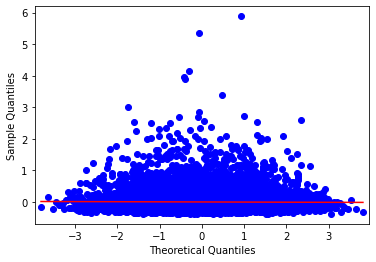

In [66]:
sm.qqplot(resids, line='r');

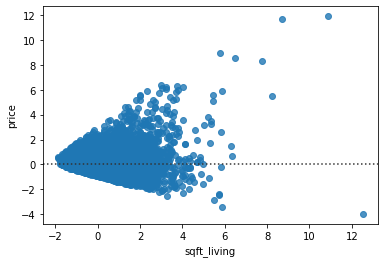

In [67]:
# resid plot sns.resid

sns.residplot(x=X, y=y);

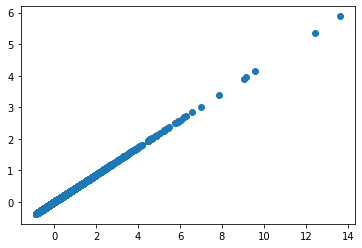

In [68]:
plt.scatter(preds, resids);

In [69]:
#Fit the dummy_regressor

dummy_lr.fit(X_s_p,y_s_p)

DummyRegressor()

In [70]:
# Score it

dummy_lr.score(X_s_p,y_s_p)

0.0

In [71]:
# Creating a straightforward, initial model --
# just for kicks
simple_formula = 'price ~ sqft_living'
simple_model = ols(formula = simple_formula,
                   data = scaled_p_df).fit()
simple_mod_summ = simple_model.summary()

simple_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                 1.366e+04
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:01:38   Log-Likelihood:                -15562.
No. Observations:               14350   AIC:                         3.113e+04
Df Residuals:                   14348   BIC:                         3.114e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.582e-17      0.006   -1.6e-14      1.000      -0.012       0.012
sqft_living     0.6984      0.006    116.881      0.000       0.687       0.710
==============================================================================
Omnibus:                    10027.296   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           388924.106
Skew:                           2.880   Prob(JB):                         0.00
Kurtosis:                      27.845   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

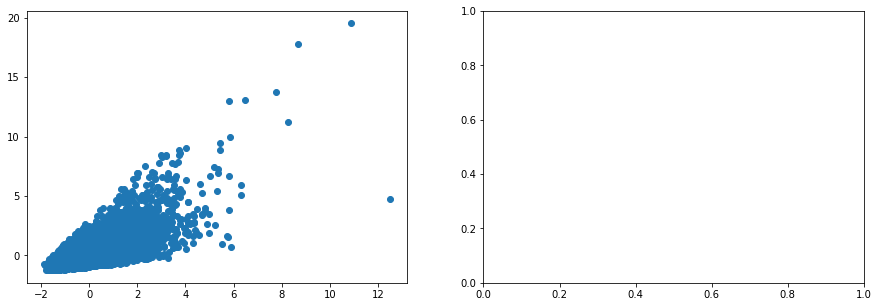

In [72]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))

x1 = scaled_p_df[['sqft_living']]
y1 = scaled_p_df[['price']]

# x2 = scaled_and_parse_df[['bedrooms']]

ax[0].scatter(x1, y1)
# ax[1].scatter(x2,y1);

In [73]:
simple_formula3 = 'price ~ sqft_living'
simple_model3 = ols(formula = simple_formula3,
                   data = scaled_p_df).fit()
simple_mod_summ3 = simple_model3.summary()

simple_mod_summ3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                 1.366e+04
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:01:38   Log-Likelihood:                -15562.
No. Observations:               14350   AIC:                         3.113e+04
Df Residuals:                   14348   BIC:                         3.114e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.582e-17      0.006   -1.6e-14      1.000      -0.012       0.012
sqft_living     0.6984      0.006    116.881      0.000       0.687       0.710
==============================================================================
Omnibus:                    10027.296   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           388924.106
Skew:                           2.880   Prob(JB):                         0.00
Kurtosis:                      27.845   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
simple_formula4 = 'price ~ sqft_living + view_GOOD + view_NONE + grade_11_Excellent + grade_12_Luxury + grade_13_Mansion + grade_5_Fair + grade_6_Low_Average + grade_7_Average + grade_8_Good+ grade_9_Better'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_p_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     1899.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:01:38   Log-Likelihood:                -13912.
No. Observations:               14350   AIC:                         2.785e+04
Df Residuals:                   14338   BIC:                         2.794e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -9.614e-17      0.005   -1.8e-14      1.000      -0.010       0.010
sqft_living             0.3787      0.008     45.193      0.000       0.362       0.395
view_GOOD              -0.0024      0.006     -0.393      0.694      -0.014       0.009
view_NONE              -0.1578      0.006    -25.536      0.000      -0.170      -0.146
grade_11_Excellent      0.0860      0.006     13.843      0.000       0.074       0.098
grade_12_Luxury         0.1311      0.006     23.088      0.000       0.120       0.142
grade_13_Mansion        0.1334      0.005     24.613      0.000       0.123       0.144
grade_5_Fair           -0.1079      0.006    -17.380      0.000      -0.120      -0.096
grade_6_Low_Average    -0.2926      0.010    -28.328      0.000      -0.313      -0.272
grade_7_Average        -0.4673      0.014    -32.468      0.000      -0.495      -0.439
grade_8_Good           -0.3619      0.012    -29.212      0.000      -0.386      -0.338
grade_9_Better         -0.1573      0.009    -17.129      0.000      -0.175      -0.139
==============================================================================
Omnibus:                     9360.776   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           399175.526
Skew:                           2.558   Prob(JB):                         0.00
Kurtosis:                      28.327   Cond. No.                         6.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
simple_formula4 = 'price ~  view_GOOD + view_NONE + grade_11_Excellent + grade_12_Luxury + grade_13_Mansion + grade_5_Fair + grade_6_Low_Average + grade_7_Average + grade_8_Good+ grade_9_Better'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_p_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     1650.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:01:38   Log-Likelihood:                -14867.
No. Observations:               14350   AIC:                         2.976e+04
Df Residuals:                   14339   BIC:                         2.984e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -9.614e-17      0.006  -1.69e-14      1.000      -0.011       0.011
view_GOOD              -0.0002      0.006     -0.028      0.978      -0.013       0.012
view_NONE              -0.1885      0.007    -28.728      0.000      -0.201      -0.176
grade_11_Excellent      0.1366      0.007     20.900      0.000       0.124       0.149
grade_12_Luxury         0.1865      0.006     31.466      0.000       0.175       0.198
grade_13_Mansion        0.1712      0.006     29.909      0.000       0.160       0.182
grade_5_Fair           -0.2082      0.006    -33.609      0.000      -0.220      -0.196
grade_6_Low_Average    -0.5594      0.009    -61.762      0.000      -0.577      -0.542
grade_7_Average        -0.8150      0.013    -62.703      0.000      -0.841      -0.790
grade_8_Good           -0.5891      0.012    -48.675      0.000      -0.613      -0.565
grade_9_Better         -0.2343      0.010    -24.301      0.000      -0.253      -0.215
==============================================================================
Omnibus:                    10662.505   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           687729.522
Skew:                           2.985   Prob(JB):                         0.00
Kurtosis:                      36.385   Cond. No.                         4.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
simple_formula4 = 'price ~ sqft_living + grade_11_Excellent + grade_12_Luxury + grade_13_Mansion + grade_5_Fair + grade_6_Low_Average + grade_7_Average + grade_8_Good+ grade_9_Better'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_p_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     2115.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:01:38   Log-Likelihood:                -14301.
No. Observations:               14350   AIC:                         2.862e+04
Df Residuals:                   14340   BIC:                         2.870e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -9.614e-17      0.005  -1.76e-14      1.000      -0.011       0.011
sqft_living             0.4088      0.009     47.861      0.000       0.392       0.426
grade_11_Excellent      0.0903      0.006     14.151      0.000       0.078       0.103
grade_12_Luxury         0.1371      0.006     23.519      0.000       0.126       0.149
grade_13_Mansion        0.1357      0.006     24.376      0.000       0.125       0.147
grade_5_Fair           -0.1103      0.006    -17.307      0.000      -0.123      -0.098
grade_6_Low_Average    -0.3007      0.011    -28.363      0.000      -0.322      -0.280
grade_7_Average        -0.4883      0.015    -33.085      0.000      -0.517      -0.459
grade_8_Good           -0.3748      0.013    -29.476      0.000      -0.400      -0.350
grade_9_Better         -0.1625      0.009    -17.227      0.000      -0.181      -0.144
==============================================================================
Omnibus:                     9640.891   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           395021.267
Skew:                           2.691   Prob(JB):                         0.00
Kurtosis:                      28.134   Cond. No.                         5.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
simple_formula4 = 'price ~ sqft_living + view_GOOD + view_NONE'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_p_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     5119.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:01:38   Log-Likelihood:                -15140.
No. Observations:               14350   AIC:                         3.029e+04
Df Residuals:                   14346   BIC:                         3.032e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.614e-17      0.006  -1.66e-14      1.000      -0.011       0.011
sqft_living     0.6514      0.006    108.219      0.000       0.640       0.663
view_GOOD       0.0055      0.007      0.846      0.397      -0.007       0.018
view_NONE      -0.1749      0.007    -26.047      0.000      -0.188      -0.162
==============================================================================
Omnibus:                     9859.835   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           413957.207
Skew:                           2.778   Prob(JB):                         0.00
Kurtosis:                      28.719   Cond. No.                         1.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
no_y_train_df = scaled_p_df.drop(columns = 'price')

In [83]:
#just bedroom, bathrooms, sqft_lot, no zipcode
no_zip_yr_built = no_y_train_df.drop(columns = ['zipcode', 'yr_built'])

In [84]:
all_var = sm.OLS(y_train, sm.add_constant(no_zip_yr_built)).fit()
all_var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     1271.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:05:25   Log-Likelihood:            -1.9738e+05
No. Observations:               14350   AIC:                         3.948e+05
Df Residuals:                   14331   BIC:                         3.949e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.414e+05   1901.585    284.707      0.000    5.38e+05    5.45e+05
view_AVERAGE        -1.427e+04   3613.656     -3.950      0.000   -2.14e+04   -7190.874
view_EXCELLENT       4.549e+04   2576.259     17.656      0.000    4.04e+04    5.05e+04
view_GOOD            3414.5157   2958.417      1.154      0.248   -2384.366    9213.397
view_NONE            -5.11e+04   4573.592    -11.173      0.000   -6.01e+04   -4.21e+04
view_nan            -7117.0143   2066.584     -3.444      0.001   -1.12e+04   -3066.242
grade_10_Very_Good   9.684e+04    1.2e+04      8.068      0.000    7.33e+04     1.2e+05
grade_11_Excellent   8.891e+04   7424.398     11.976      0.000    7.44e+04    1.03e+05
grade_12_Luxury      7.282e+04   4118.315     17.683      0.000    6.48e+04    8.09e+04
grade_13_Mansion     5.747e+04   2289.198     25.105      0.000     5.3e+04     6.2e+04
grade_5_Fair         2961.2790   5597.328      0.529      0.597   -8010.209    1.39e+04
grade_6_Low_Average  1.744e+04   1.54e+04      1.134      0.257   -1.27e+04    4.76e+04
grade_7_Average      4.342e+04   2.59e+04      1.677      0.094   -7340.519    9.42e+04
grade_8_Good         6.379e+04   2.37e+04      2.693      0.007    1.74e+04     1.1e+05
grade_9_Better       8.425e+04   1.73e+04      4.856      0.000    5.02e+04    1.18e+05
bedrooms            -1.503e+04   2450.401     -6.135      0.000   -1.98e+04   -1.02e+04
bathrooms           -5276.1553   3087.812     -1.709      0.088   -1.13e+04     776.355
sqft_living          1.498e+05   4011.250     37.353      0.000    1.42e+05    1.58e+05
sqft_lot            -1.514e+04   1949.575     -7.765      0.000    -1.9e+04   -1.13e+04
==============================================================================
Omnibus:                     9029.743   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           419881.220
Skew:                           2.392   Prob(JB):                         0.00
Kurtosis:                      29.064   Cond. No.                         42.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""